# Outlines :
1. Importing libraries
2. Missing values imputation(data preprocessing)
3. EDA
4. Feature Engineering
5. Model Building
6. Model evaluation


In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')


In [2]:
data = pd.read_csv(r'C:\Users\aryan\Desktop\datasets\spotify\dataset.csv')

In [3]:
data.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [4]:
data.shape

(114000, 21)

In [5]:
 # see how many missing values are there in the dataset .

data.isnull().sum()

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [6]:
 # since the number of null is minimal compared to the size of data set we can simply drop the samples .(rows) .

data.dropna(axis=0,inplace=True)

In [7]:
data.shape

(113999, 21)

In [8]:
data.isnull().sum()

Unnamed: 0          0
track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [9]:
 # it was only one sample having null values hence dropped .

In [10]:
# checking datatypes 

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113999 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        113999 non-null  int64  
 1   track_id          113999 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        113999 non-null  int64  
 6   duration_ms       113999 non-null  int64  
 7   explicit          113999 non-null  bool   
 8   danceability      113999 non-null  float64
 9   energy            113999 non-null  float64
 10  key               113999 non-null  int64  
 11  loudness          113999 non-null  float64
 12  mode              113999 non-null  int64  
 13  speechiness       113999 non-null  float64
 14  acousticness      113999 non-null  float64
 15  instrumentalness  113999 non-null  float64
 16  liveness          11

In [11]:
 # looks like we can drop the unnamed column
    
data.drop('Unnamed: 0',axis = 1,inplace=True)

In [12]:
data.head(1)

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.461,1,-6.746,0,0.143,0.0322,0.000001,0.358,0.715,87.917,4,acoustic


In [13]:
# the duration of the tracks is given in miliseconds : converting it to seconds . (mili-seconds*0.001)

def to_seconds(val):
    return val*0.001

data['duration_ms'] = data['duration_ms'].apply(to_seconds)

In [14]:
data.head(5)

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230.666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149.610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210.826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201.933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198.853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [15]:
# rename duration_ms to duration (for understanding purpose only)

data.rename(columns = {'duration_ms':'duration'},inplace=True)

In [16]:
data.columns

Index(['track_id', 'artists', 'album_name', 'track_name', 'popularity',
       'duration', 'explicit', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'track_genre'],
      dtype='object')

In [17]:
# making loudness column positive . 

def positives(x):
    return x*-1
 
data['loudness'] = data['loudness'].apply(positives)

In [18]:
# now the columns are good and we can start the EDA .


# Explanatory Data Analysis

In [19]:
data

,track_id,artists,album_name,track_name,popularity,duration,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230.666,False,0.676,0.4610,1,6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149.610,False,0.420,0.1660,1,17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210.826,False,0.438,0.3590,0,9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201.933,False,0.266,0.0596,0,18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198.853,False,0.618,0.4430,2,9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384.999,False,0.172,0.2350,5,16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385.000,False,0.174,0.1170,0,18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271.466,False,0.629,0.3290,0,10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283.893,False,0.587,0.5060,7,10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


<AxesSubplot:xlabel='explicit', ylabel='count'>

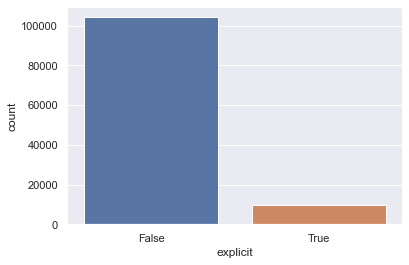

In [20]:
sns.countplot(x = 'explicit',data=data)

<AxesSubplot:xlabel='track_genre'>

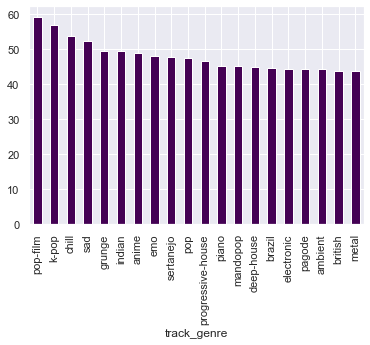

In [21]:
data.groupby('track_genre')['popularity'].mean().nlargest(20).plot(kind='bar',cmap='viridis')

<AxesSubplot:ylabel='popularity'>

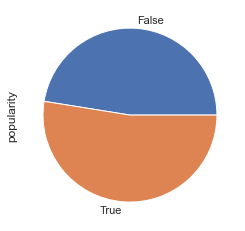

In [22]:
data.groupby('explicit')['popularity'].mean().plot(kind='pie')

In [23]:
data.groupby(['artists','track_genre','track_name'])['popularity'].mean().nlargest(20)

artists                     track_genre  track_name                           
Sam Smith;Kim Petras        dance        Unholy (feat. Kim Petras)                100.0
                            pop          Unholy (feat. Kim Petras)                100.0
Bizarrap;Quevedo            hip-hop      Quevedo: Bzrp Music Sessions, Vol. 52     99.0
Manuel Turizo               latin        La Bachata                                98.0
                            latino       La Bachata                                98.0
                            reggae       La Bachata                                98.0
                            reggaeton    La Bachata                                98.0
Bad Bunny                   latin        Tití Me Preguntó                          97.0
                            latino       Tití Me Preguntó                          97.0
                            reggae       Tití Me Preguntó                          97.0
                            reggaeton    

In [24]:
data.track_genre.nunique()

114

In [39]:
# making a function to plot popularity mean against passed feature values :


def popularity_with(x):
    plt.figure(figsize=(12,6))
    plt.scatter(data[x],data['popularity'])
    plt.title('{} and popularity'.format(x))
    plt.show()
        
# nothing clear is acutally found with this function . so we will try splitting the data        

In [26]:
data.columns

Index(['track_id', 'artists', 'album_name', 'track_name', 'popularity',
       'duration', 'explicit', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'track_genre'],
      dtype='object')

In [27]:
song_report = pd.DataFrame(data.groupby('track_genre').aggregate({'danceability':'mean','energy':'mean','loudness':'mean','speechiness':'mean',
                                       'acousticness':'mean','instrumentalness':'mean','liveness':'mean',
                                      'valence':'mean','tempo':'mean','time_signature':'mean'}))

In [28]:
song_report

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
track_genre,,,,,,,,,,
acoustic,0.549593,0.435368,9.447843,0.043247,0.566816,0.038336,0.153244,0.424023,119.010624,3.885
afrobeat,0.669580,0.702812,7.789353,0.086579,0.270860,0.253483,0.184596,0.698619,119.213337,3.946
alt-rock,0.534493,0.754173,6.191489,0.055071,0.122162,0.054097,0.210249,0.518260,124.634404,3.939
alternative,0.559927,0.720030,6.078777,0.070101,0.147820,0.038159,0.201376,0.495570,122.232394,3.942
ambient,0.367867,0.237162,18.601365,0.041562,0.776790,0.676221,0.129283,0.167498,111.113129,3.653
...,...,...,...,...,...,...,...,...,...,...
techno,0.684348,0.746413,8.077874,0.064212,0.081414,0.540038,0.159434,0.321878,128.255482,3.967
trance,0.583409,0.845272,6.329711,0.079705,0.035870,0.423501,0.234357,0.276881,133.276726,3.957
trip-hop,0.634695,0.622363,9.239915,0.076303,0.225615,0.383761,0.190342,0.478069,118.743616,3.945


<AxesSubplot:>

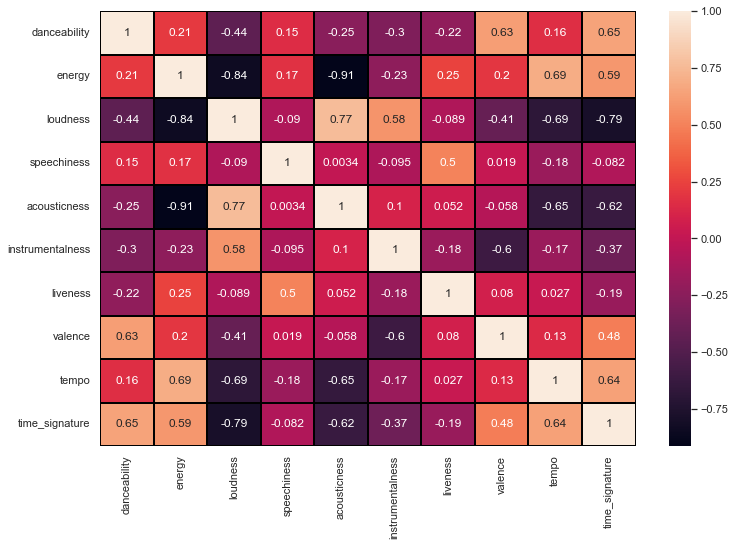

In [29]:
plt.figure(figsize=(12,8))
sns.heatmap(song_report.corr(),annot=True,linecolor='black',linewidths=2.0)

In [30]:
# Now using the above heatmap we can plot the columns which have good correlation

# Now we can also see the type of distribution of the columns (symmetric or skewed)

In [31]:
def plot(x):
    plt.figure(figsize=(12,6))
    plt.title('distribution plot of {}'.format(x),fontsize = 20)
    sns.distplot(data[x])
    plt.show()

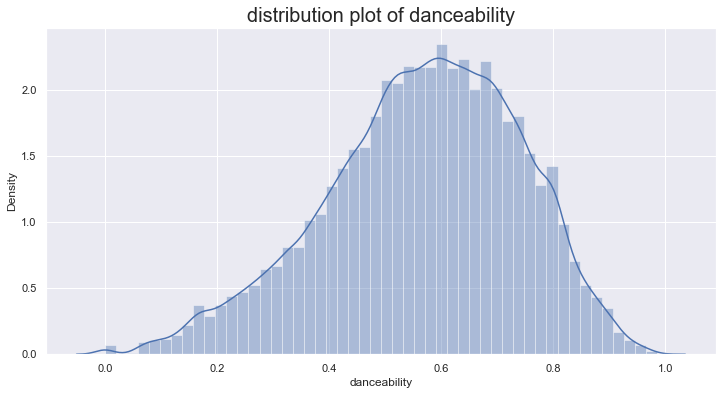

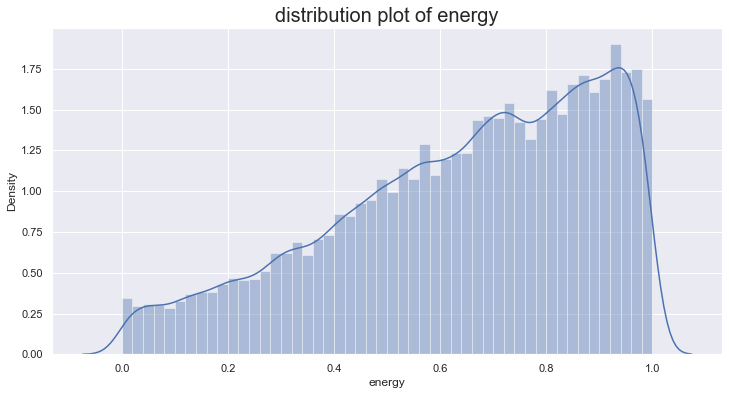

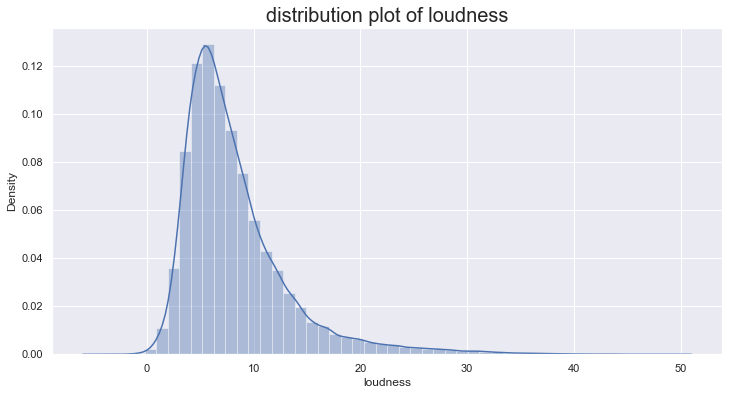

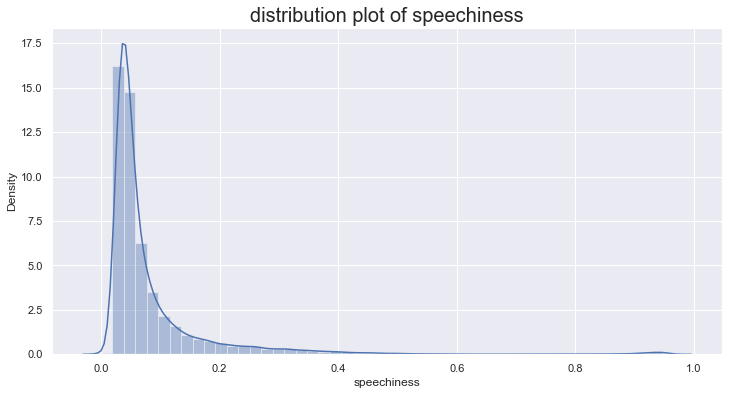

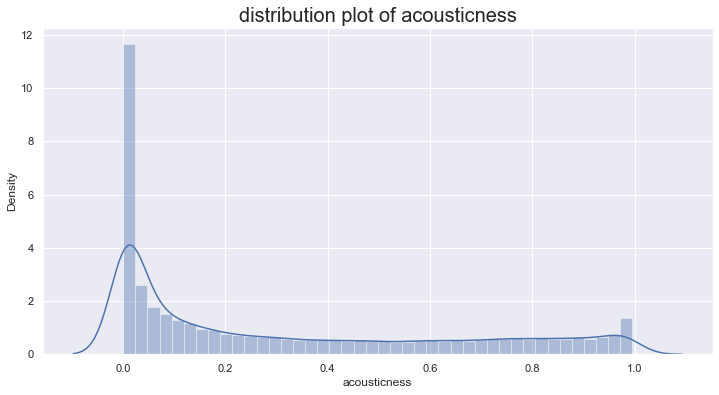

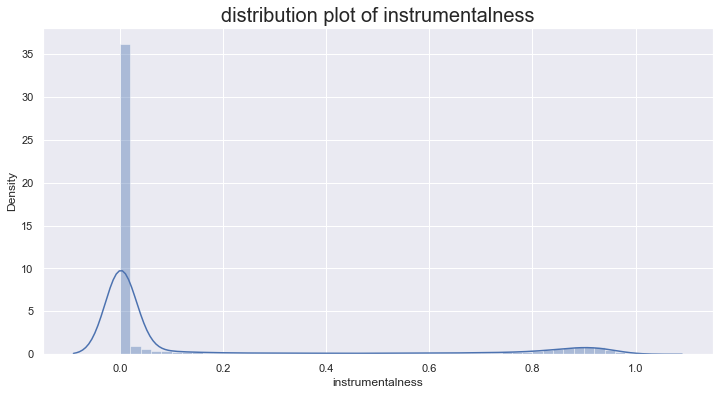

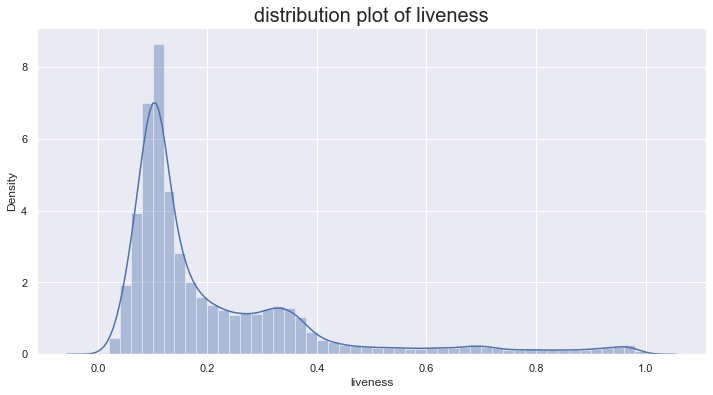

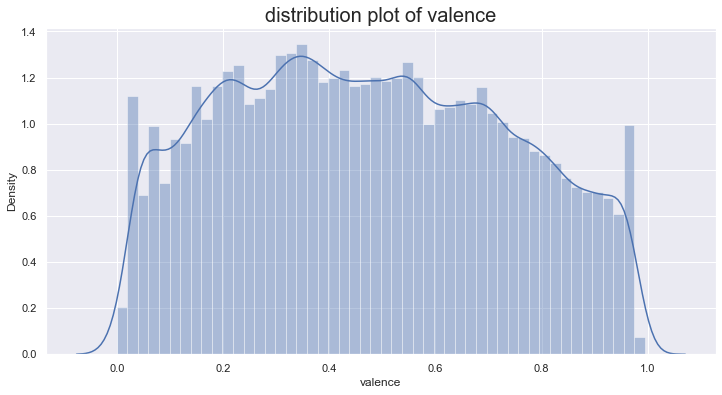

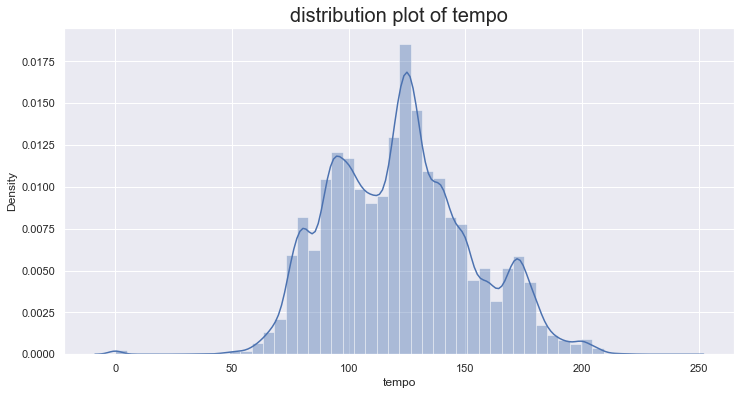

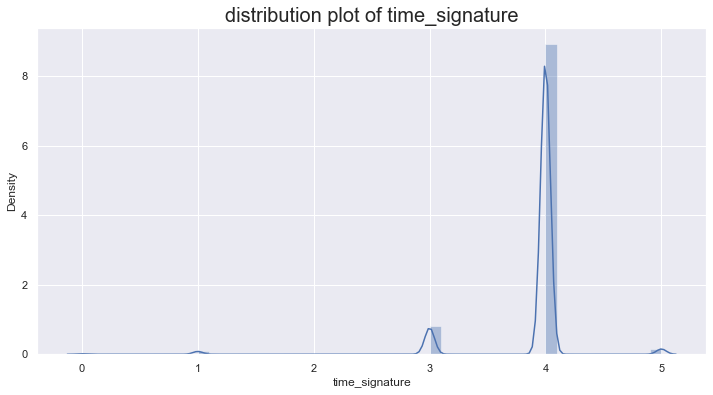

In [46]:
cols = song_report.columns
for i in cols:
    plot(i)

In [34]:
# making a function to plot the correlated columns together in a scatterplot 

In [35]:
def sc_plot(df):
    tick=1
    t = np.arange(len(df))
    ls = list(df.columns)
    ls2 = ls.copy()
    for i in ls:
        for j in ls2:
            if (i==j):
                continue
            else:
                if(df[i].corr(df[j]) > 0.40):
                    plt.subplot(10,2,tick)
                    plt.figure(figsize=(5,5))
                    plt.title('Scatter plot between {} and {}'.format(i,j),fontsize=18)
                    plt.scatter(df[i],df[j],c=t,cmap='viridis')
                    plt.xlabel(i)
                    plt.ylabel(j)
                    plt.show()
                    tick+=1

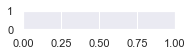

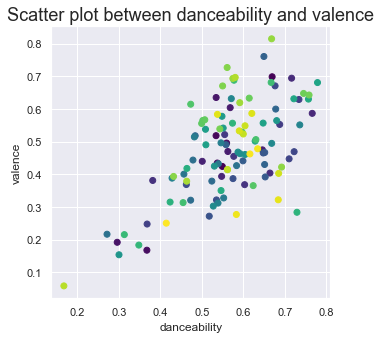

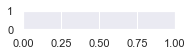

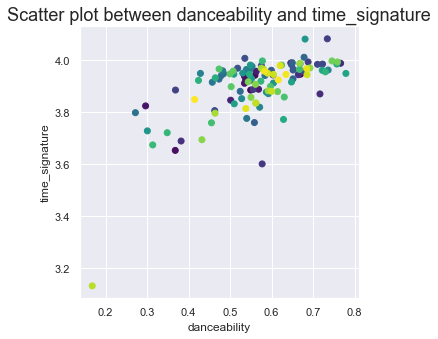

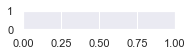

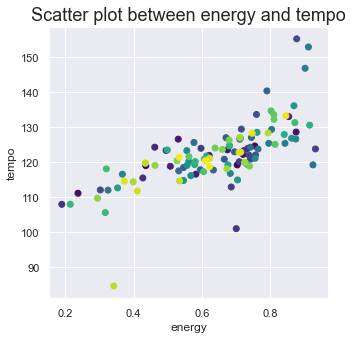

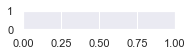

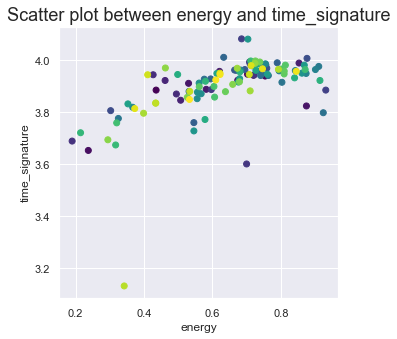

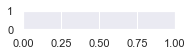

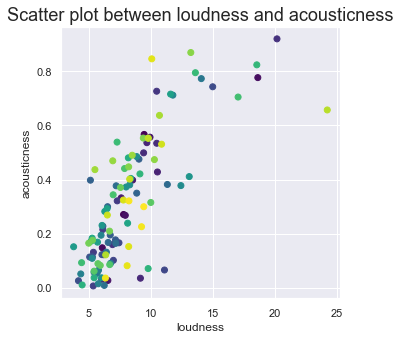

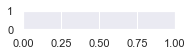

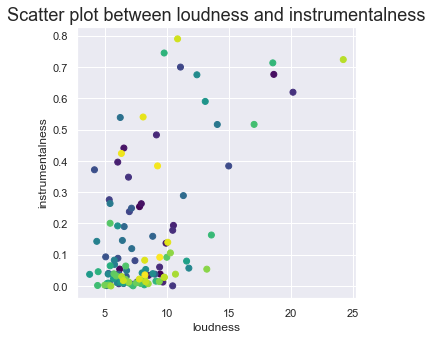

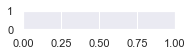

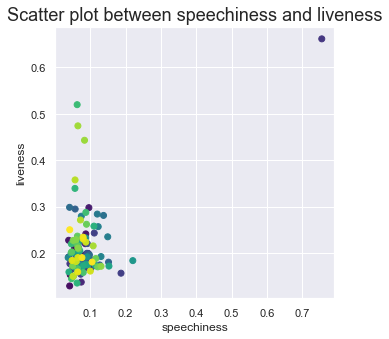

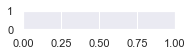

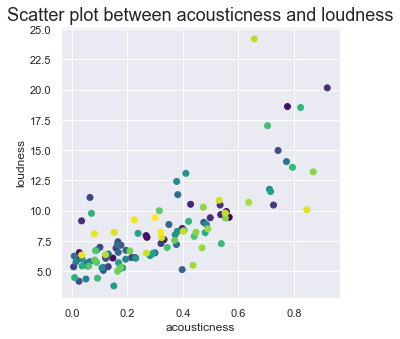

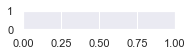

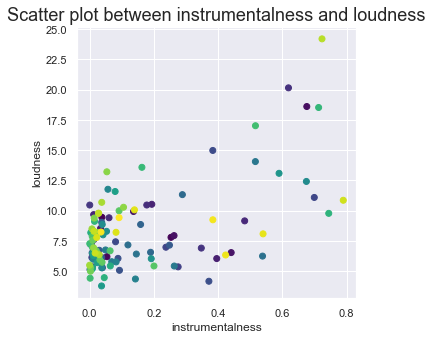

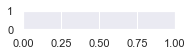

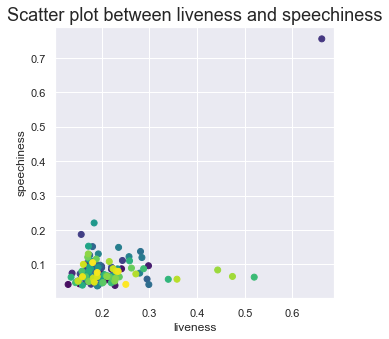

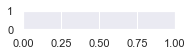

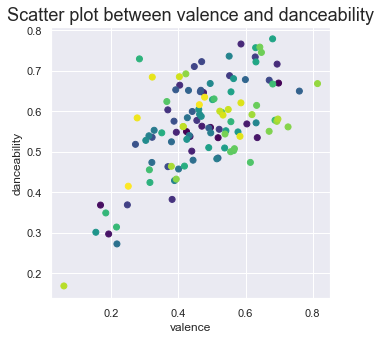

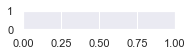

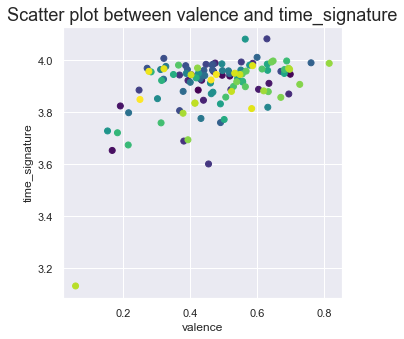

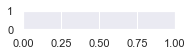

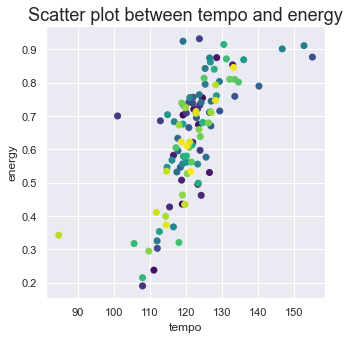

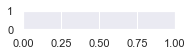

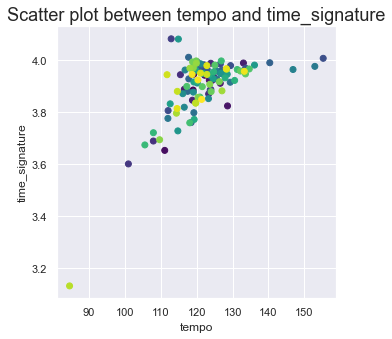

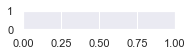

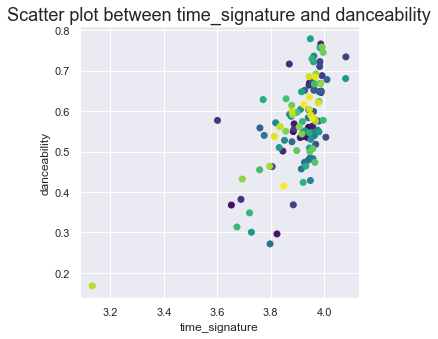

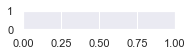

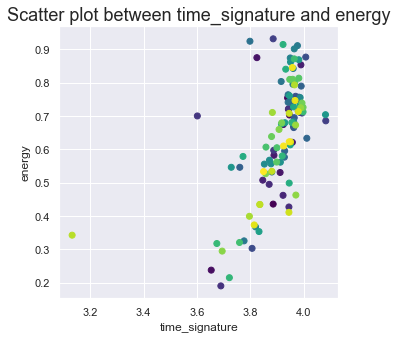

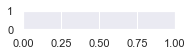

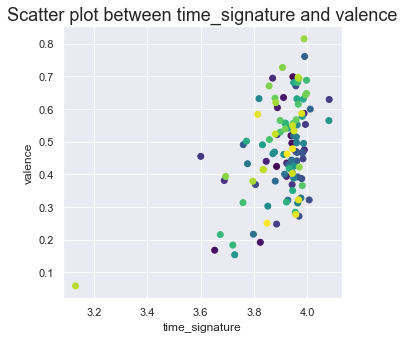

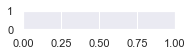

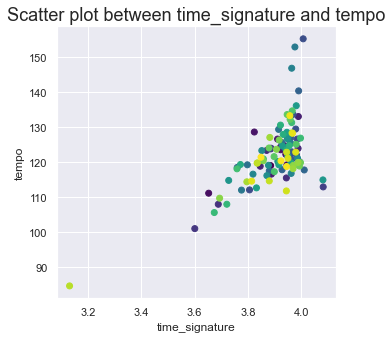

In [36]:
sc_plot(song_report)

In [47]:
# in the above cell the scatter plots are also reversed plot between x,y and y,x both are present .



# EDA Conclusions :

# Feature Engineering for model  

In [61]:
# Copying the data to new data frame for explicidity classification part

data_2 = data.copy()


In [62]:
data_2.columns

Index(['track_id', 'artists', 'album_name', 'track_name', 'popularity',
       'duration', 'explicit', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'track_genre'],
      dtype='object')

In [63]:
# Dropping some unnecessary columns

data_2.drop(columns=['artists','track_id','album_name','track_name','key'],axis=1,inplace=True)

In [64]:
data_2

,popularity,duration,explicit,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,73,230.666,False,0.676,0.4610,6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,55,149.610,False,0.420,0.1660,17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,57,210.826,False,0.438,0.3590,9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,71,201.933,False,0.266,0.0596,18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,82,198.853,False,0.618,0.4430,9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,21,384.999,False,0.172,0.2350,16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,22,385.000,False,0.174,0.1170,18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,22,271.466,False,0.629,0.3290,10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,41,283.893,False,0.587,0.5060,10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


In [65]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113999 entries, 0 to 113999
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   popularity        113999 non-null  int64  
 1   duration          113999 non-null  float64
 2   explicit          113999 non-null  bool   
 3   danceability      113999 non-null  float64
 4   energy            113999 non-null  float64
 5   loudness          113999 non-null  float64
 6   mode              113999 non-null  int64  
 7   speechiness       113999 non-null  float64
 8   acousticness      113999 non-null  float64
 9   instrumentalness  113999 non-null  float64
 10  liveness          113999 non-null  float64
 11  valence           113999 non-null  float64
 12  tempo             113999 non-null  float64
 13  time_signature    113999 non-null  int64  
 14  track_genre       113999 non-null  object 
dtypes: bool(1), float64(10), int64(3), object(1)
memory usage: 13.2+ MB


In [68]:
# one hot encoding the track_genre column

x_t = pd.get_dummies(data_2['track_genre'],prefix = 'track_genre',prefix_sep='_',drop_first=True)
data_2 = data_2.join(x_t)
data_2.drop('track_genre',axis=1,inplace=True)

In [69]:
data_2

,popularity,duration,explicit,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,...,track_genre_spanish,track_genre_study,track_genre_swedish,track_genre_synth-pop,track_genre_tango,track_genre_techno,track_genre_trance,track_genre_trip-hop,track_genre_turkish,track_genre_world-music
0,73,230.666,False,0.676,0.4610,6.746,0,0.1430,0.0322,0.000001,...,0,0,0,0,0,0,0,0,0,0
1,55,149.610,False,0.420,0.1660,17.235,1,0.0763,0.9240,0.000006,...,0,0,0,0,0,0,0,0,0,0
2,57,210.826,False,0.438,0.3590,9.734,1,0.0557,0.2100,0.000000,...,0,0,0,0,0,0,0,0,0,0
3,71,201.933,False,0.266,0.0596,18.515,1,0.0363,0.9050,0.000071,...,0,0,0,0,0,0,0,0,0,0
4,82,198.853,False,0.618,0.4430,9.681,1,0.0526,0.4690,0.000000,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,21,384.999,False,0.172,0.2350,16.393,1,0.0422,0.6400,0.928000,...,0,0,0,0,0,0,0,0,0,1
113996,22,385.000,False,0.174,0.1170,18.318,0,0.0401,0.9940,0.976000,...,0,0,0,0,0,0,0,0,0,1
113997,22,271.466,False,0.629,0.3290,10.895,0,0.0420,0.8670,0.000000,...,0,0,0,0,0,0,0,0,0,1
113998,41,283.893,False,0.587,0.5060,10.889,1,0.0297,0.3810,0.000000,...,0,0,0,0,0,0,0,0,0,1


In [70]:
# Label encoding the Explicit column

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [71]:
data_2['explicit'] = encoder.fit_transform(data_2['explicit'])

In [72]:
data_2

,popularity,duration,explicit,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,...,track_genre_spanish,track_genre_study,track_genre_swedish,track_genre_synth-pop,track_genre_tango,track_genre_techno,track_genre_trance,track_genre_trip-hop,track_genre_turkish,track_genre_world-music
0,73,230.666,0,0.676,0.4610,6.746,0,0.1430,0.0322,0.000001,...,0,0,0,0,0,0,0,0,0,0
1,55,149.610,0,0.420,0.1660,17.235,1,0.0763,0.9240,0.000006,...,0,0,0,0,0,0,0,0,0,0
2,57,210.826,0,0.438,0.3590,9.734,1,0.0557,0.2100,0.000000,...,0,0,0,0,0,0,0,0,0,0
3,71,201.933,0,0.266,0.0596,18.515,1,0.0363,0.9050,0.000071,...,0,0,0,0,0,0,0,0,0,0
4,82,198.853,0,0.618,0.4430,9.681,1,0.0526,0.4690,0.000000,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,21,384.999,0,0.172,0.2350,16.393,1,0.0422,0.6400,0.928000,...,0,0,0,0,0,0,0,0,0,1
113996,22,385.000,0,0.174,0.1170,18.318,0,0.0401,0.9940,0.976000,...,0,0,0,0,0,0,0,0,0,1
113997,22,271.466,0,0.629,0.3290,10.895,0,0.0420,0.8670,0.000000,...,0,0,0,0,0,0,0,0,0,1
113998,41,283.893,0,0.587,0.5060,10.889,1,0.0297,0.3810,0.000000,...,0,0,0,0,0,0,0,0,0,1


In [75]:
#separating feature and target 


y = data_2.pop('explicit')
x = data_2

In [77]:
#also we need to oversample the data because of imbalance in y

from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')


In [78]:
x_sm, y_sm = smote.fit_resample(x,y)

In [82]:
# scaling the feature data and splitting into train and test

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [83]:
x_sm[x_sm.columns] = scaler.fit_transform(x_sm[x_sm.columns])

In [84]:
x_sm

,popularity,duration,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,...,track_genre_spanish,track_genre_study,track_genre_swedish,track_genre_synth-pop,track_genre_tango,track_genre_techno,track_genre_trance,track_genre_trip-hop,track_genre_turkish,track_genre_world-music
0,1.661479,0.137302,0.456931,-0.987607,-0.153574,-1.044479,0.072579,-0.794936,-0.423087,0.735131,...,-0.069768,-0.06942,-0.070939,-0.069907,-0.06942,-0.069907,-0.069838,-0.071313,-0.081327,-0.06942
1,0.884810,-0.712509,-1.056766,-2.321608,2.313207,0.957415,-0.355045,2.236825,-0.423069,-0.657220,...,-0.069768,-0.06942,-0.070939,-0.069907,-0.06942,-0.069907,-0.069838,-0.071313,-0.081327,-0.06942
2,0.971107,-0.070705,-0.950334,-1.448854,0.549138,0.957415,-0.487115,-0.190487,-0.423091,-0.570536,...,-0.069768,-0.06942,-0.070939,-0.069907,-0.06942,-0.069907,-0.069838,-0.071313,-0.081327,-0.06942
3,1.575183,-0.163942,-1.967349,-2.802753,2.614235,0.957415,-0.611492,2.172233,-0.422814,-0.489271,...,-0.069768,-0.06942,-0.070939,-0.069907,-0.06942,-0.069907,-0.069838,-0.071313,-0.081327,-0.06942
4,2.049814,-0.196233,0.113984,-1.069003,0.536674,0.957415,-0.506990,0.690009,-0.423091,-0.755280,...,-0.069768,-0.06942,-0.070939,-0.069907,-0.06942,-0.069907,-0.069838,-0.071313,-0.081327,-0.06942
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208499,-0.237046,-0.900780,1.476883,0.098129,-0.326315,0.957415,0.448066,-0.394173,-0.423046,0.327272,...,-0.069768,-0.06942,-0.070939,-0.069907,-0.06942,-0.069907,-0.069838,-0.071313,-0.081327,-0.06942
208500,0.237586,-0.087595,1.354956,-1.343554,-0.406196,-1.044479,0.685694,1.720954,-0.423090,-0.506594,...,-0.069768,-0.06942,-0.070939,-0.069907,-0.06942,-0.069907,-0.069838,-0.071313,-0.081327,-0.06942
208501,-0.150749,1.187580,-0.916762,0.203839,-0.100943,0.957415,-0.434966,0.152049,0.834109,-0.043384,...,-0.069768,-0.06942,-0.070939,-0.069907,-0.06942,-0.069907,-0.069838,-0.071313,-0.081327,-0.06942
208502,-1.402050,-0.263081,1.261082,0.794077,-0.864046,0.957415,-0.489039,-0.636174,-0.422436,-0.619296,...,-0.069768,-0.06942,-0.070939,-0.069907,-0.06942,-0.069907,-0.069838,-0.071313,-0.081327,-0.06942


In [85]:
x_train,x_test,y_train,y_test = train_test_split(x_sm,y_sm,train_size=0.75, random_state=25)

In [86]:
x_train.shape

(156378, 126)

In [87]:
x_test.shape

(52126, 126)

In [88]:
y_train.shape

(156378,)

In [89]:
y_test.shape

(52126,)

#  Logistic Regression

In [90]:
from sklearn.linear_model import LogisticRegression
model_1 = LogisticRegression()

model_1.fit(x_train,y_train)



LogisticRegression()

In [91]:
y_model_1 = model_1.predict(x_test)

In [93]:
from sklearn.metrics import accuracy_score
accuracy_score(y_model_1,y_test)

0.9101024440778115

In [92]:
from sklearn.metrics import classification_report
print(classification_report(y_model_1,y_test))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91     26860
           1       0.90      0.92      0.91     25266

    accuracy                           0.91     52126
   macro avg       0.91      0.91      0.91     52126
weighted avg       0.91      0.91      0.91     52126



#  Decision Tree Classifier

In [94]:
from sklearn.tree import DecisionTreeClassifier
model_2 = DecisionTreeClassifier()

model_2.fit(x_train,y_train)

DecisionTreeClassifier()

In [95]:
y_model_2 = model_2.predict(x_test)

In [98]:
accuracy_score(y_model_2,y_test)

0.9048843187660668

In [99]:
print(classification_report(y_model_2,y_test))

              precision    recall  f1-score   support

           0       0.89      0.92      0.90     25434
           1       0.92      0.89      0.91     26692

    accuracy                           0.90     52126
   macro avg       0.90      0.91      0.90     52126
weighted avg       0.91      0.90      0.90     52126



#  Random Forest Classifier


In [100]:
from sklearn.ensemble import RandomForestClassifier
model_3 = RandomForestClassifier()

model_3.fit(x_train,y_train)

RandomForestClassifier()

In [101]:
y_model_3 = model_3.predict(x_test)

In [102]:
accuracy_score(y_model_3,y_test)

0.9583701032114492

In [103]:
print(classification_report(y_model_3,y_test))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96     25928
           1       0.96      0.95      0.96     26198

    accuracy                           0.96     52126
   macro avg       0.96      0.96      0.96     52126
weighted avg       0.96      0.96      0.96     52126



#  Random Forest classifier has the best accuracy score of 96 %

# Saving the trained model in the local directory

In [104]:
import joblib as jb


In [105]:
jb.dump(model_1, r'C:\Users\aryan\Desktop\Trained_models\spoify_logistic_model.pkl')

['C:\\Users\\aryan\\Desktop\\Trained_models\\spoify_logistic_model.pkl']

In [106]:
jb.dump(model_2, r'C:\Users\aryan\Desktop\Trained_models\spotify_decision_tree_model.pkl')

['C:\\Users\\aryan\\Desktop\\Trained_models\\spotify_decision_tree_model.pkl']

In [107]:
jb.dump(model_3, r'C:\Users\aryan\Desktop\Trained_models\spotify_rand_for_model.pkl')

['C:\\Users\\aryan\\Desktop\\Trained_models\\spotify_rand_for_model.pkl']

# END